In [103]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [110]:
# Load the CSV files into a list of DataFrames
data_dir = "data/keog/"

os.environ['OMP_NUM_THREADS'] = '1'

dataframes = []
dates = []
clusters = 4

for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_dir, file))
        dataframes.append(df)
        first_date = df['datetime'].iloc[0][:10]
        dates.append(first_date)


In [111]:
# Ensure consistent shape by pivoting each DataFrame (time as columns, latitude as rows)
heatmaps = []

for df in dataframes:
    pivot_df = df.pivot(index='gdlat', columns='time_seconds', values='blrmvd')
    heatmaps.append(pivot_df)

# Convert each pivoted DataFrame to a flattened vector
dfs = [hm.values.flatten() for hm in heatmaps]

In [112]:
# Convert to NumPy array
dfs = np.array(dfs)

# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
heatmaps_imputed = imputer.fit_transform(dfs)

In [113]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=clusters, random_state=42)  # Adjust number of clusters as needed
labels = kmeans.fit_predict(heatmaps_imputed)

c:\Users\Maria\anaconda3\envs\gradu\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [114]:
# Print the dates for each cluster
for i in range(clusters):
    cluster_indices = np.where(labels == i)[0]
    print(f"Cluster {i}:")
    for idx in cluster_indices:
        print(f" - Date: {dates[idx]}")

Cluster 0:
 - Date: 2018-01-05
 - Date: 2018-01-06
 - Date: 2018-01-13
 - Date: 2018-01-26
 - Date: 2018-01-28
 - Date: 2018-02-15
 - Date: 2018-03-06
 - Date: 2018-03-15
 - Date: 2018-03-20
 - Date: 2018-03-21
 - Date: 2018-04-29
 - Date: 2018-05-09
 - Date: 2018-05-13
 - Date: 2018-05-16
 - Date: 2018-06-17
 - Date: 2018-06-18
 - Date: 2018-06-23
 - Date: 2018-07-07
 - Date: 2018-07-16
 - Date: 2018-07-28
 - Date: 2018-08-02
 - Date: 2018-08-13
 - Date: 2018-08-18
 - Date: 2018-09-01
 - Date: 2018-09-06
 - Date: 2018-10-10
 - Date: 2018-11-02
 - Date: 2018-11-04
 - Date: 2018-11-20
 - Date: 2018-11-25
 - Date: 2018-12-10
 - Date: 2018-12-18
 - Date: 2019-01-16
 - Date: 2019-01-19
 - Date: 2019-01-21
 - Date: 2019-01-24
 - Date: 2019-01-31
 - Date: 2019-02-15
 - Date: 2019-02-27
 - Date: 2019-02-28
 - Date: 2019-03-20
 - Date: 2019-03-24
 - Date: 2019-04-06
 - Date: 2019-04-25
 - Date: 2019-04-29
 - Date: 2019-05-08
 - Date: 2019-06-10
 - Date: 2019-06-13
 - Date: 2019-06-19
 - Date: 

Cluster 0: 149 heatmaps


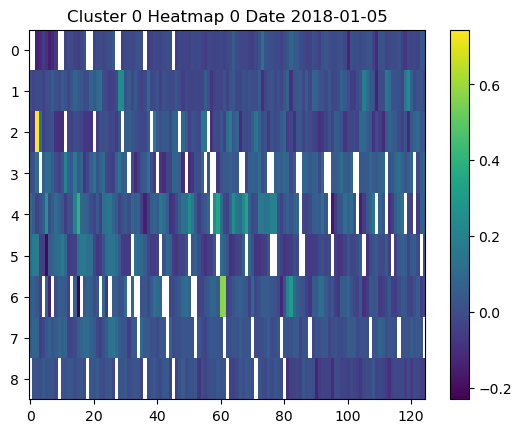

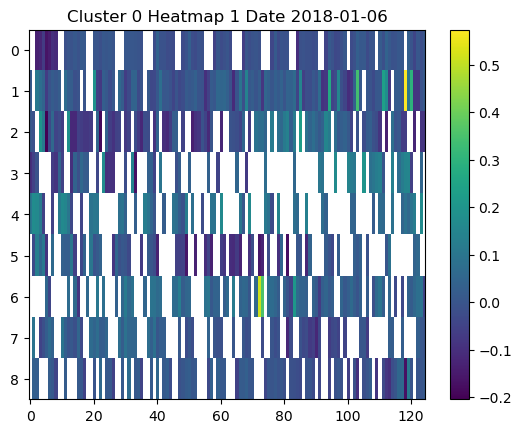

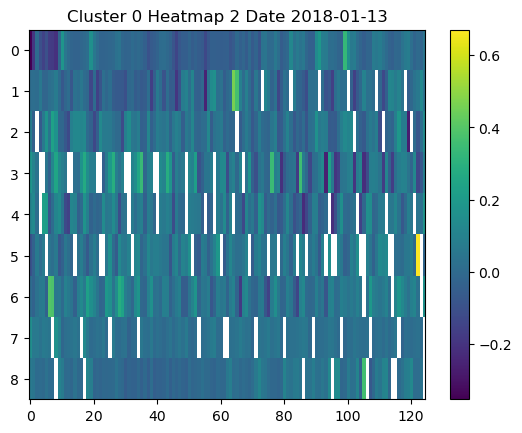

Cluster 1: 15 heatmaps


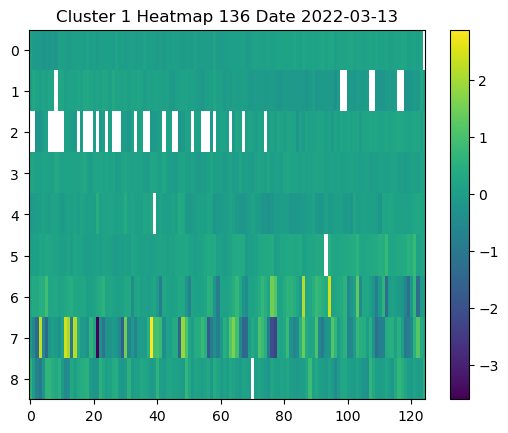

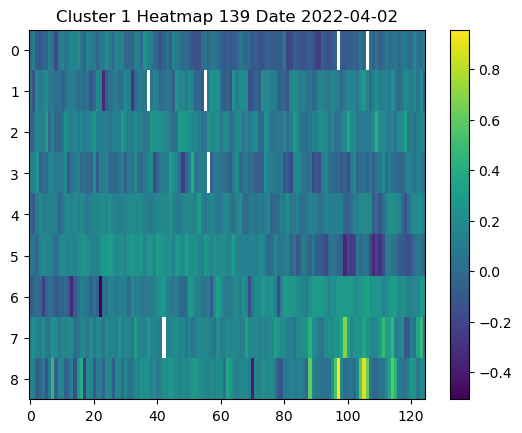

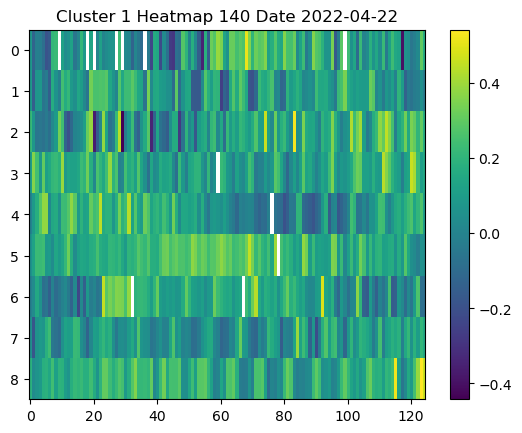

Cluster 2: 13 heatmaps


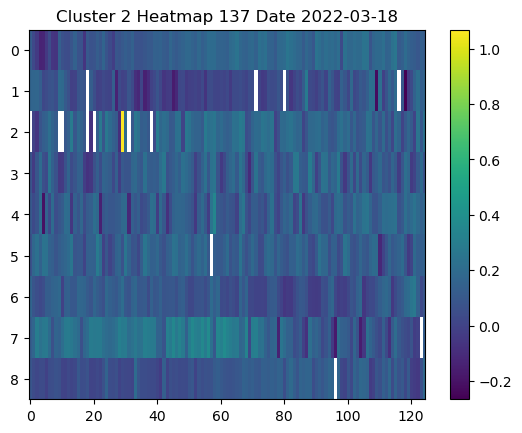

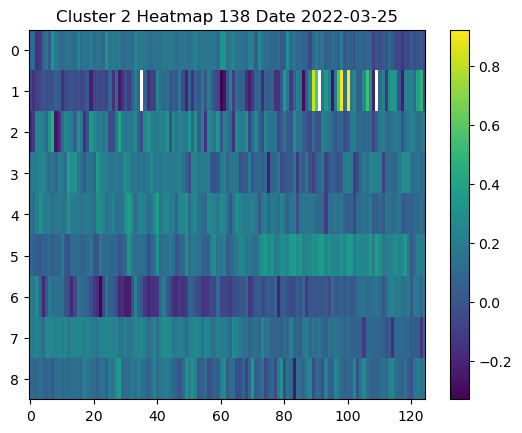

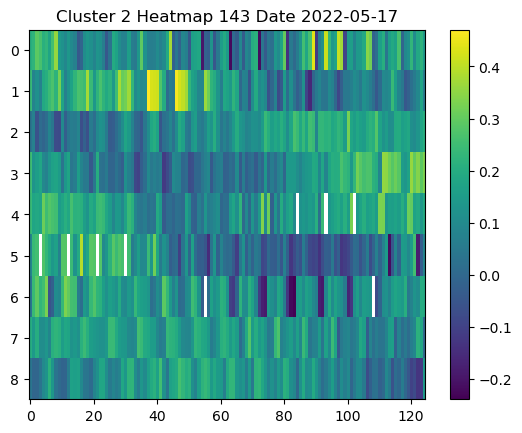

Cluster 3: 1 heatmaps


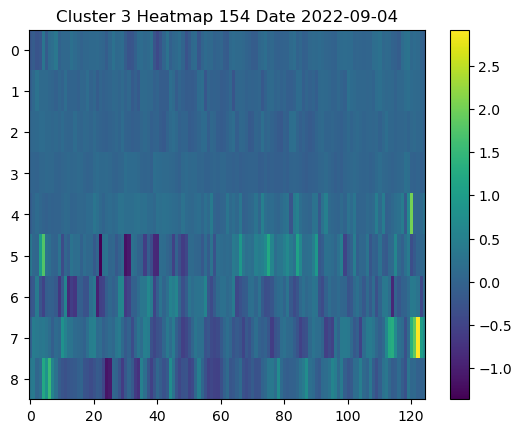

In [115]:
# Analyze the clusters
for i in range(clusters):
    cluster_indices = np.where(labels == i)[0]
    print(f"Cluster {i}: {len(cluster_indices)} heatmaps")
    # Optionally, visualize some of the heatmaps in this cluster
    for idx in cluster_indices[:3]:  # Show first 3 heatmaps in this cluster
        plt.imshow(heatmaps[idx], aspect='auto', cmap='viridis')
        plt.title(f"Cluster {i} Heatmap {idx} Date {dates[idx]}")
        plt.colorbar()
        plt.show()